## Segmentation - part2
@moon

In [1]:
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt
plt.gray()
from ipywidgets import interact, fixed
external_viewer = sitk.ImageViewer()
slicer_app_location = "C:\\Users\\perk\\AppData\\Local\\NA-MIC\\Slicer 5.2.2\\Slicer.exe"
external_viewer.SetApplication(slicer_app_location)
%config Completer.use_jedi = False

<Figure size 640x480 with 0 Axes>

size:  (256, 256, 112)
spacing:  (0.9375, 0.9375, 1.399999976158142)
pixel type:  16-bit signed integer


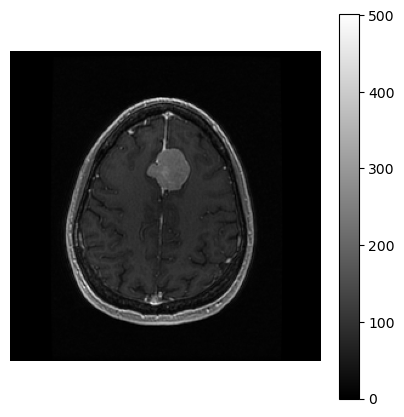

In [2]:
# read the data
img = sitk.ReadImage('BrainTumor.nii')

print('size: ',img.GetSize())
print('spacing: ',img.GetSpacing())
print('pixel type: ',img.GetPixelIDTypeAsString())

slice_no = 76
plt.figure(figsize=(5,5))
plt.imshow(sitk.GetArrayFromImage(img[:,:,slice_no]))
plt.colorbar()
plt.axis('off')
plt.show()

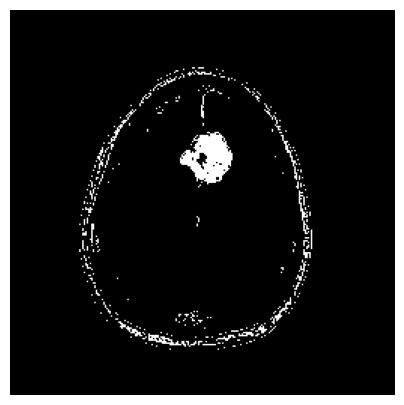

In [12]:
# thresholding
thresh_filter = sitk.BinaryThresholdImageFilter()

# 120-200:1 , outside this range will be 0
thresh_filter.SetLowerThreshold(150)
thresh_filter.SetUpperThreshold(200)
thresh_filter.SetInsideValue(1)
thresh_filter.SetOutsideValue(0)
img_tresh = thresh_filter.Execute(img)

plt.figure(figsize=(5,5))
plt.imshow(sitk.GetArrayFromImage(img_tresh[:,:,slice_no]))
plt.axis('off')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


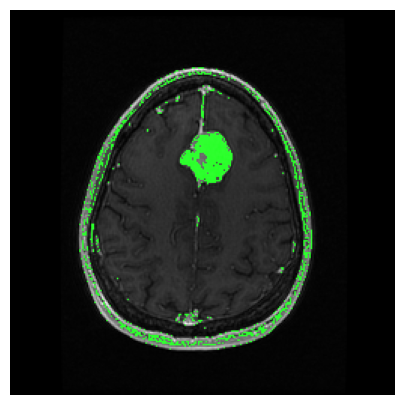

In [17]:
# overlay the mask
img_overlay = sitk.LabelOverlay(img/500, img_tresh)
# 500 is the max pixel value
# convert to rgb and add on top
plt.figure(figsize=(5,5))
plt.imshow(sitk.GetArrayFromImage(img_overlay[:,:,slice_no]))
plt.axis('off')
plt.show()

## Hands-on 1
Apply Otsu thresholding to the volumetric brain. Extract the detected threshold from the filter and print it. Alos, plot the hstigram of the image to confirm the result

## Hands-on 2
Apply Canny edge detection filter to the image. Try different values for variance and upper threshold.